# **Classificando Vinhos**

Para a análise, foi utilizado o dataset *Wine Quality Dataset* disponível no Kaggle: https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

## **Conhecendo os dados**


In [383]:
import pandas as pd

In [384]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/classificacao_multiclasse/main/Dados/df_vinho.csv')

In [385]:
df.head()

,acidez fixa,acidez volátil,ácido cítrico,açúcar residual,cloretos,dióxido de enxofre livre,dióxido de enxofre total,densidade,pH,sulfatos,álcool,qualidade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,mediano
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,mediano
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,mediano
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,mediano
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,mediano


In [386]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   acidez fixa                1359 non-null   float64
 1   acidez volátil             1359 non-null   float64
 2   ácido cítrico              1359 non-null   float64
 3   açúcar residual            1359 non-null   float64
 4   cloretos                   1359 non-null   float64
 5   dióxido de enxofre livre   1359 non-null   float64
 6   dióxido de enxofre total   1359 non-null   float64
 7   densidade                  1359 non-null   float64
 8   pH                         1359 non-null   float64
 9   sulfatos                   1359 non-null   float64
 10  álcool                     1359 non-null   float64
 11  qualidade                  1359 non-null   object 
dtypes: float64(11), object(1)
memory usage: 127.5+ KB


In [387]:
df['qualidade'].unique()

array(['mediano', 'bom', 'ruim'], dtype=object)

In [388]:
df.describe()

,acidez fixa,acidez volátil,ácido cítrico,açúcar residual,cloretos,dióxido de enxofre livre,dióxido de enxofre total,densidade,pH,sulfatos,álcool
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [389]:
df.head()

,acidez fixa,acidez volátil,ácido cítrico,açúcar residual,cloretos,dióxido de enxofre livre,dióxido de enxofre total,densidade,pH,sulfatos,álcool,qualidade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,mediano
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,mediano
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,mediano
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,mediano
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,mediano


In [448]:
df['qualidade'].value_counts()

qualidade
mediano    1112
bom         184
ruim         63
Name: count, dtype: int64

In [390]:
colunas_categoricas = ['qualidade']

df[colunas_categoricas].describe()

,qualidade
count,1359
unique,3
top,mediano
freq,1112


## **Explorando os dados**

In [391]:
import matplotlib.pyplot as plt
import seaborn as sns

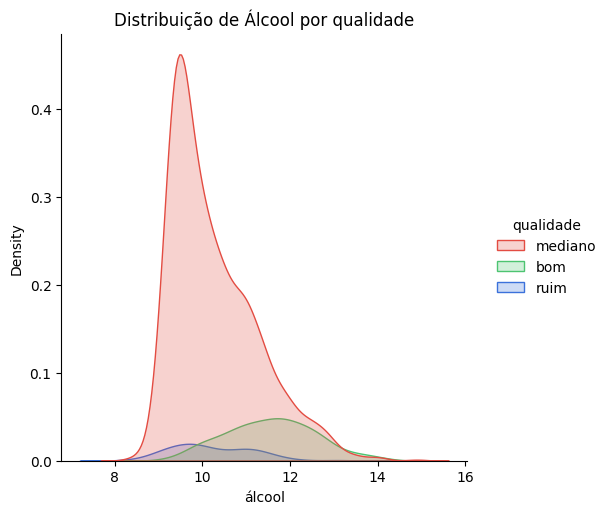

In [392]:
sns.displot(data=df, x='álcool', hue='qualidade', kind='kde', fill=True)
plt.title('Distribuição de Álcool por qualidade')
plt.show()

In [393]:
import plotly.express as px

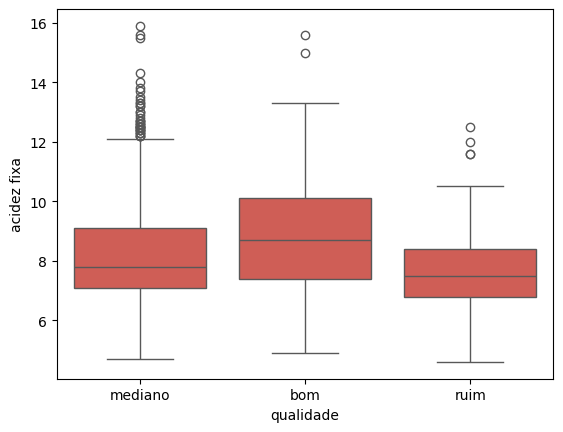

In [394]:
sns.boxplot(x='qualidade', y='acidez fixa', data=df)
plt.show()

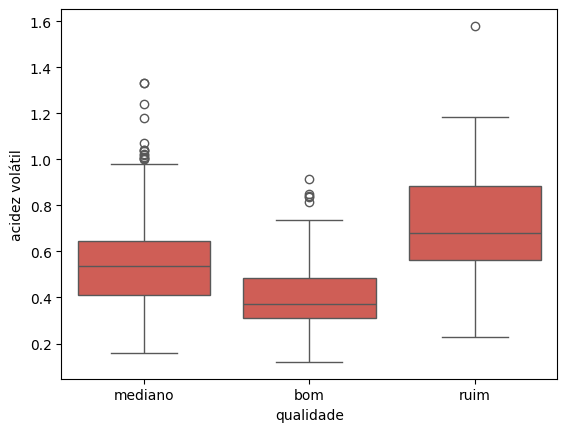

In [395]:
sns.boxplot(x='qualidade', y='acidez volátil', data=df)
plt.show()

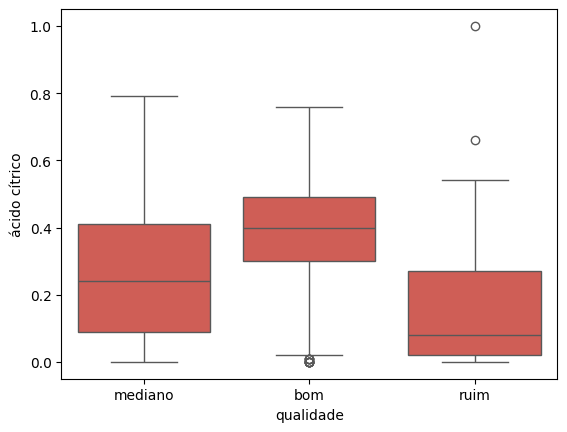

In [396]:
sns.boxplot(x='qualidade', y='ácido cítrico', data=df)
plt.show()

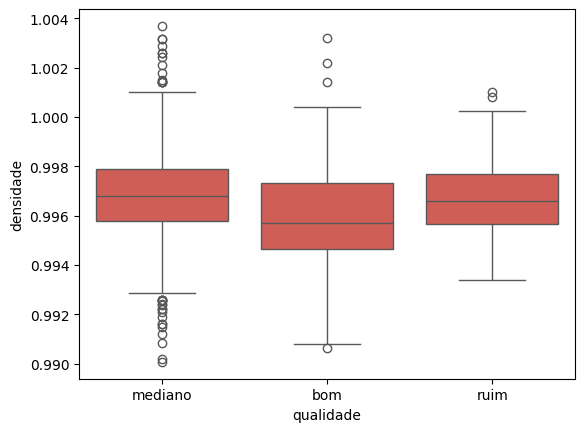

In [397]:
sns.boxplot(x='qualidade', y='densidade', data=df)
plt.show()

In [398]:
df['qualidade'].value_counts(normalize = True)*100

qualidade
mediano    81.824871
bom        13.539367
ruim        4.635762
Name: proportion, dtype: float64

## **Realizando o treinamento**

### **Separando os dados**

In [427]:
X

,acidez fixa,acidez volátil,ácido cítrico,açúcar residual,cloretos,dióxido de enxofre livre,dióxido de enxofre total,densidade,pH,sulfatos,álcool
282,10.0,0.490,0.20,11.0,0.071,13.0,50.0,1.00150,3.16,0.69,9.2
546,7.6,0.685,0.23,2.3,0.111,20.0,84.0,0.99640,3.21,0.61,9.3
757,9.2,0.560,0.18,1.6,0.078,10.0,21.0,0.99576,3.15,0.49,9.9
1246,10.0,0.690,0.11,1.4,0.084,8.0,24.0,0.99578,2.88,0.47,9.7
395,10.4,0.330,0.63,2.8,0.084,5.0,22.0,0.99980,3.26,0.74,11.2
...,...,...,...,...,...,...,...,...,...,...,...
608,7.5,0.380,0.48,2.6,0.073,22.0,84.0,0.99720,3.32,0.70,9.6
687,10.8,0.890,0.30,2.6,0.132,7.0,60.0,0.99786,2.99,1.18,10.2
368,9.5,0.560,0.33,2.4,0.089,35.0,67.0,0.99720,3.28,0.73,11.8
514,9.9,0.490,0.58,3.5,0.094,9.0,43.0,1.00040,3.29,0.58,9.0


In [399]:
X = df.drop('qualidade', axis=1)
y = df['qualidade']

In [400]:
from sklearn.model_selection import train_test_split

In [401]:
X, X_teste, y, y_teste = train_test_split(X, y, test_size=0.15, stratify=y, random_state=0)
X_treino, X_val, y_treino, y_val = train_test_split(X, y, stratify=y, random_state=0)

## **Treinando o modelo com Random Forest Classifier**

In [402]:
from sklearn.ensemble import RandomForestClassifier

In [403]:
modelo_rf = RandomForestClassifier(random_state=0, max_depth=5)
modelo_rf.fit(X_treino, y_treino)
y_pred = modelo_rf.predict(X_val)
print(f'Acurácia de treino: {modelo_rf.score(X_treino, y_treino)}')
print(f'Acurácia de validação: {modelo_rf.score(X_val, y_val)}')

Acurácia de treino: 0.8868360277136259
Acurácia de validação: 0.8304498269896193


### **Analisando a matriz de confusão**

In [404]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

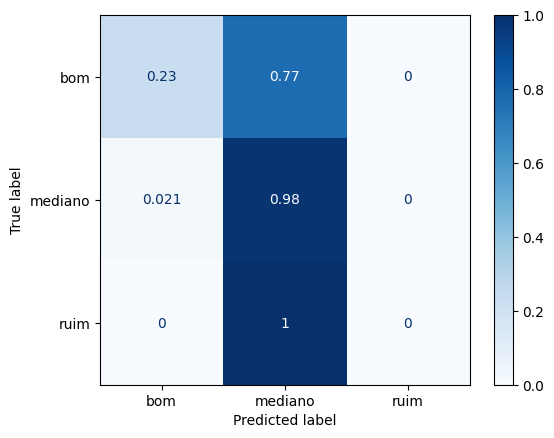

In [405]:
matriz_confusao = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize='true', cmap='Blues');

### **Analisando o relatório de métricas**

In [406]:
from sklearn.metrics import classification_report

In [407]:
report = classification_report(y_val, y_pred)
print("Relatório de Classificação:\n", report);

Relatório de Classificação:
               precision    recall  f1-score   support

         bom       0.64      0.23      0.34        39
     mediano       0.84      0.98      0.90       236
        ruim       0.00      0.00      0.00        14

    accuracy                           0.83       289
   macro avg       0.49      0.40      0.41       289
weighted avg       0.77      0.83      0.78       289



c:\Users\Luciane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Luciane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Luciane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### **Aplicando a técnica de superamostragem**

In [408]:
from imblearn.over_sampling import SMOTE

In [409]:
# o balanceamento é realizado somente nos dados de treino

oversample = SMOTE(random_state=0)
X_balanceado, y_balanceado = oversample.fit_resample(X_treino, y_treino)

In [410]:
y_balanceado.value_counts()

qualidade
mediano    709
bom        709
ruim       709
Name: count, dtype: int64

In [411]:
modelo = RandomForestClassifier(random_state=0, max_depth=10)
modelo.fit(X_balanceado, y_balanceado)
y_pred = modelo.predict(X_val)

              precision    recall  f1-score   support

         bom       0.45      0.74      0.56        39
     mediano       0.92      0.75      0.83       236
        ruim       0.23      0.50      0.31        14

    accuracy                           0.74       289
   macro avg       0.53      0.67      0.57       289
weighted avg       0.82      0.74      0.77       289



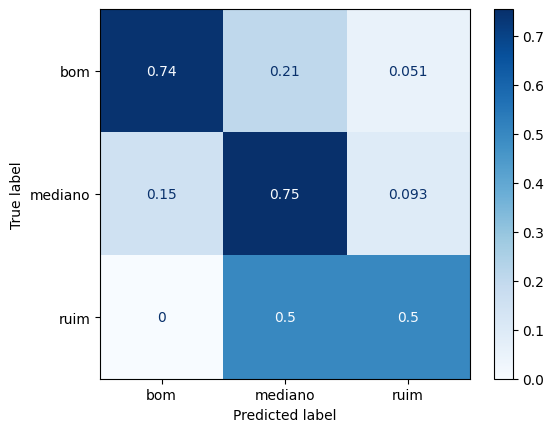

In [412]:
print(classification_report(y_val, y_pred))
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize='true', cmap='Blues');

### **Aplicando a técnica de subamostragem**

In [413]:
from imblearn.under_sampling import RandomUnderSampler

In [414]:
rus = RandomUnderSampler(random_state=42, sampling_strategy = 'auto')
X_reamostrado, y_reamostrado = rus.fit_resample(X_treino, y_treino)

In [415]:
y.value_counts()

qualidade
mediano    945
bom        156
ruim        54
Name: count, dtype: int64

In [416]:
y_reamostrado.value_counts()

qualidade
bom        40
mediano    40
ruim       40
Name: count, dtype: int64

In [417]:
modelo2 = RandomForestClassifier(random_state=0, max_depth=10)
modelo2.fit(X_reamostrado, y_reamostrado)
y_pred_2 = modelo2.predict(X_val)

              precision    recall  f1-score   support

         bom       0.33      0.77      0.47        39
     mediano       0.94      0.53      0.67       236
        ruim       0.10      0.50      0.17        14

    accuracy                           0.56       289
   macro avg       0.46      0.60      0.44       289
weighted avg       0.82      0.56      0.62       289



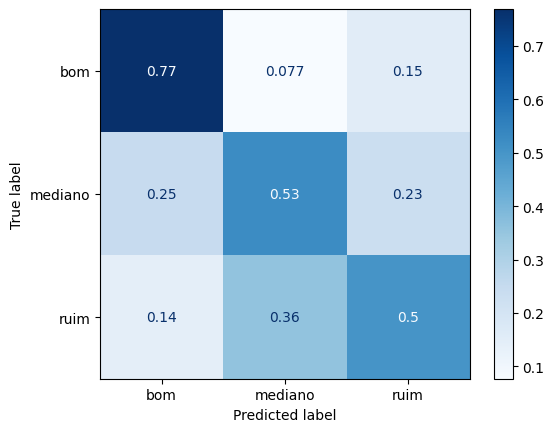

In [418]:
print(classification_report(y_val, y_pred_2))
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_2, normalize='true', cmap='Blues');

###  **Comparando as duas situações**

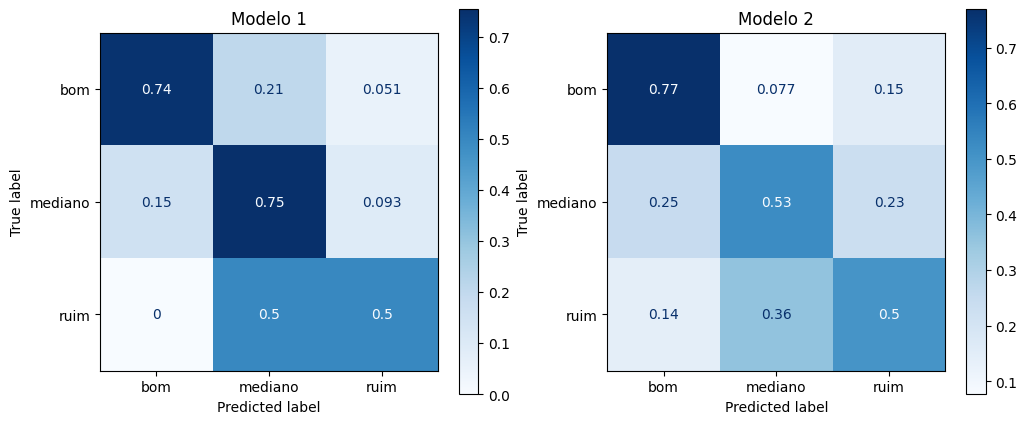

In [420]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 5))


ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize='true', cmap='Blues', ax=ax[0])
ax[0].set_title('Modelo 1')

ConfusionMatrixDisplay.from_predictions(y_val, y_pred_2, normalize='true', cmap='Blues', ax=ax[1])
ax[1].set_title('Modelo 2')

plt.show()

### **Pipeline para validação**

In [421]:
from imblearn.pipeline import Pipeline as imbpipeline

In [422]:
modelo = RandomForestClassifier(max_depth = 10)
pipeline = imbpipeline([('oversample', SMOTE()), ('floresta', modelo)])

In [423]:
from sklearn.model_selection import cross_validate, StratifiedKFold

In [424]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring='recall_weighted')
cv_resultados['test_score']

array([0.76190476, 0.76190476, 0.70995671, 0.74458874, 0.76190476])

In [425]:
# Intervalo de confiança
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()
print(f'Intervalo de confiança: [{media-2*desvio_padrao}, {min(media+2*desvio_padrao, 1.0)}]')

Intervalo de confiança: [0.7076644024599461, 0.78843949364395]


### **Testando o modelo**


              precision    recall  f1-score   support

         bom       0.49      0.61      0.54        28
     mediano       0.90      0.83      0.86       167
        ruim       0.31      0.56      0.40         9

    accuracy                           0.78       204
   macro avg       0.57      0.66      0.60       204
weighted avg       0.82      0.78      0.80       204



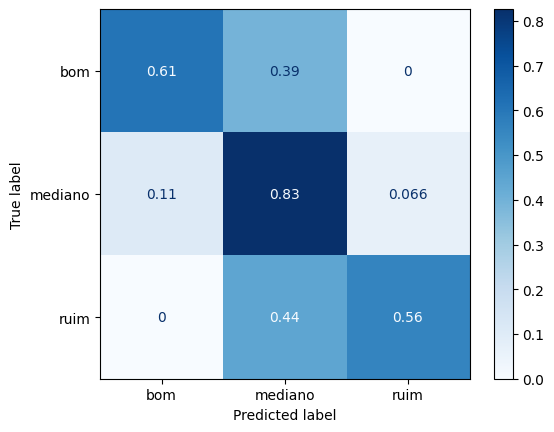

In [426]:
oversample = SMOTE(random_state=0)
X_balanceado, y_balanceado = oversample.fit_resample(X, y)
modelo = RandomForestClassifier(random_state=0, max_depth=10)
modelo.fit(X_balanceado, y_balanceado)
y_pred = modelo.predict(X_teste)

print(classification_report(y_teste, y_pred))
ConfusionMatrixDisplay.from_predictions(y_teste, y_pred, normalize='true', cmap='Blues');

### **Aplicando o Modelo**

In [442]:
X.columns

Index(['acidez fixa', 'acidez volátil', 'ácido cítrico', 'açúcar residual',
       'cloretos', 'dióxido de enxofre livre ', 'dióxido de enxofre total',
       'densidade', 'pH', 'sulfatos', 'álcool'],
      dtype='object')

In [447]:
exemplos = pd.DataFrame({
    'acidez fixa': [7.4, 7.8, 7.8],
    'acidez volátil': [0.70, 0.88, 0.76],
    'ácido cítrico': [0.00, 0.00, 0.04],
    'açúcar residual': [1.9, 2.6, 2.3],
    'cloretos': [0.076, 0.098, 0.092],
    'dióxido de enxofre livre ': [11.0, 25.0, 15.0],
    'dióxido de enxofre total': [34.0, 67.0, 54.0],
    'densidade': [0.9978, 0.9968, 0.9970],
    'pH': [3.51, 3.20, 3.26],
    'sulfatos': [0.56, 0.68, 0.65],
    'álcool': [9.4, 9.8, 9.8]
})


predicoes = modelo.predict(exemplos)
exemplos['qualidade'] = predicoes
display(exemplos)


,acidez fixa,acidez volátil,ácido cítrico,açúcar residual,cloretos,dióxido de enxofre livre,dióxido de enxofre total,densidade,pH,sulfatos,álcool,qualidade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,mediano
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,mediano
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,mediano
